In [2]:
# some imports
import numpy as np
import matplotlib.pyplot as plt

# Estimation via sampling




## Area of a circle

Consider a circle with radius r=1 centered at the point (0,0). Pretend you don't know how to compute the area of a circle and don't know $\pi$. Use your knowledge of sampling to approximate the area of the circle.

Bonus:
How many samples to correctly estimate $\pi$ up to 4 decimals?

In [3]:
def sample_uniform_grid(low, high, size):
    return np.random.uniform(low = low, high = high, size = size)

In [4]:
def point_in_circle_mask(samples):
    return samples[:,0]**2 + samples[:,1]**2 <= 1

In [5]:
# Draw samples
samples = sample_uniform_grid(-1, 1, (1000, 2))
in_samples = samples[point_in_circle_mask(samples)]
out_samples = samples[point_in_circle_mask(samples)==False]

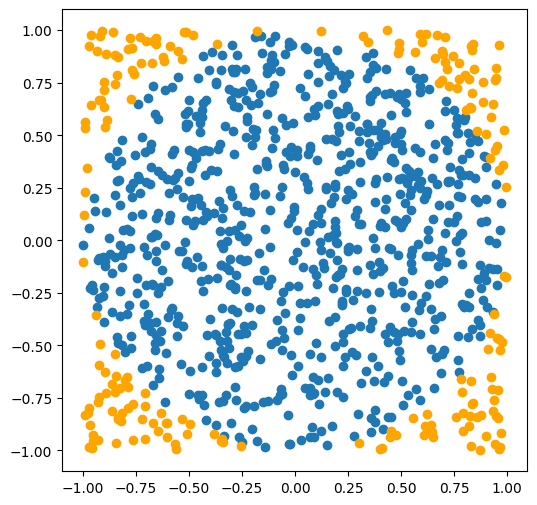

In [6]:
plt.figure(figsize=((6,6)))
plt.scatter(in_samples[:,0], in_samples[:,1])
plt.scatter(out_samples[:,0], out_samples[:,1], color='orange')


In [7]:
print('Pie Approximation:', len(in_samples)/len(samples) * 4)

Pie Approximation: 3.192


## Random Walk
Consider a gambler who starts gambling with £30. The gambler will keep going either until he is broke, until he has more than £60, or until he has played a maximum of 50 games. 
Each game he has to pay £1 to play and if he wins he will get back £4. If he looses the buy in is lost. His probability of winning a game is 1/3.

Note: The gambler can't go into debt, but he might leave with £62 if he buys into a game at £59 adn wins.

How much money can he expect to walk away with?

In [8]:
print('Theoretical Expectation in 50 games: ', ((2/3)*(-1) + (1/3)*(4))*50)

Theoretical Expectation in 50 games:  33.33333333333333


In [9]:
def sample_binomial_games(n_samples):
    return np.random.binomial(1,1/3, size = (50,n_samples))

In [11]:
def get_outcome_of_walk(sample):
    purse = 30
    game_count = 0
    while game_count <=50:
        game_count += 1
        purse += -1 + 4 * sample[game_count-1]
        if purse < 0:
            purse = 0
            break
        if purse > 60:
            break
    
    return purse


In [12]:
def run_random_walk(n_samples):
    samples = sample_binomial_games(n_samples)
    outcomes = [get_outcome_of_walk(sample) for sample in samples]
    return np.mean(outcomes)

In [13]:
for i in range(2, 8, 2):
    print('Expected outcome: ', run_random_walk(n_samples = 10**i))

Expected outcome:  46.26
Expected outcome:  46.66
Expected outcome:  45.52


# Inversion Sampling

Use the inversion sampling method to sample from the following distribution (Weibull):

$$f(x ; \lambda, k)= \begin{cases}\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1} e^{-(x / \lambda)^k}, & x \geq 0 \\ 0, & x<0\end{cases}$$

Then use your samples to approximate the probability $P(X<1.5)$ for $\lambda=1$ and $k=1.5$. Check how the variance behaves in relation to the number of samples.

In [15]:
def sample_weibull(l,k,n):
  '''Function to draw n samples from the weibull distribution
  parametrised by l:=lambda and k via inversion sampling'''
  
  return l * (- np.log(np.random.uniform(0,1,n)))**(1/k)

In [16]:
def estimate_prob(l,k,n,t):
  '''Function takes in weibull parameters, samples n observations 
  of X using the previous function, xand computes the estimate of P(X<t)'''
  
  # proportion of samples less than t
  return np.mean(sample_weibull(l,k,n)<t)

In [19]:
t = 1.5
prob = estimate_prob(1,1.5, 1000, t)

print(f"Probability x < {t}: {prob}")

Probability x < 1.5: 0.852


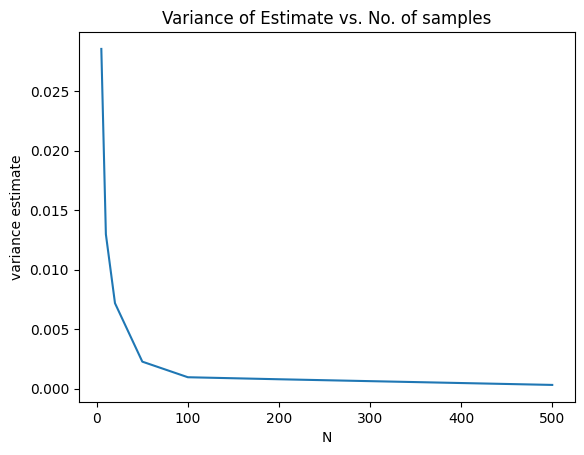

In [24]:
N_list = [5,10,20,50,100,200,500]
variances = []

for N in N_list:
  estimates = []
  for i in range(50):
    estimates.append(estimate_prob(1, 1.5, N, 1.5))
  variances.append(np.var(estimates))

plt.plot(N_list, variances)
plt.title("Variance of Estimate vs. No. of samples")
plt.ylabel('variance estimate')
plt.xlabel('N');

It can be seen that as the number of samples grows, the variance of the estimates reduces.